## Predicción de precios de automóviles

Importamos dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 


df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data')
df.columns = ['symboling','normalized-losses','make','fuel-type', 'aspiration','num-of-doors','body-style',
  'drive-wheels','engine-location','wheel-base','length','width','height','curb-weight','engine-type','num-of-cylinders',
 'engine-size','fuel-system', 'bore', 'stroke','compression-ratio','horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg',
'price']
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
5,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
6,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
7,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
8,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?
9,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430


### preprocesamiento



In [ ]:
df.describe(),df.shape,df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          204 non-null    int64  
 1   normalized-losses  204 non-null    object 
 2   make               204 non-null    object 
 3   fuel-type          204 non-null    object 
 4   aspiration         204 non-null    object 
 5   num-of-doors       204 non-null    object 
 6   body-style         204 non-null    object 
 7   drive-wheels       204 non-null    object 
 8   engine-location    204 non-null    object 
 9   wheel-base         204 non-null    float64
 10  length             204 non-null    float64
 11  width              204 non-null    float64
 12  height             204 non-null    float64
 13  curb-weight        204 non-null    int64  
 14  engine-type        204 non-null    object 
 15  num-of-cylinders   204 non-null    object 
 16  engine-size        204 non

(        symboling  wheel-base      length       width      height  \
 count  204.000000  204.000000  204.000000  204.000000  204.000000   
 mean     0.823529   98.806373  174.075000   65.916667   53.749020   
 std      1.239035    5.994144   12.362123    2.146716    2.424901   
 min     -2.000000   86.600000  141.100000   60.300000   47.800000   
 25%      0.000000   94.500000  166.300000   64.075000   52.000000   
 50%      1.000000   97.000000  173.200000   65.500000   54.100000   
 75%      2.000000  102.400000  183.200000   66.900000   55.500000   
 max      3.000000  120.900000  208.100000   72.300000   59.800000   
 
        curb-weight  engine-size  compression-ratio    city-mpg  highway-mpg  
 count   204.000000   204.000000         204.000000  204.000000   204.000000  
 mean   2555.602941   126.892157          10.148137   25.240196    30.769608  
 std     521.960820    41.744569           3.981000    6.551513     6.898337  
 min    1488.000000    61.000000           7.000000 

In [ ]:
#reemplazar '?' por valores nan
df = df.replace(to_replace='?',value=np.nan)
missing = pd.isna(df).sum()
print(missing)

symboling             0
normalized-losses    40
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64


Aplicare el metodo forward filling (llenar el dato faltante con el valor siguiente de su respectiva columna), utilicé este metodo por el orden de los datos, entonces es muy probable que el valor faltante pueda ser el valor que está antes o despues. 

In [ ]:
df = df.fillna(method='bfill') # utilizar la siguiente observación válida 
print(df)
missing = pd.isna(df).sum()
print(missing)

     symboling normalized-losses         make fuel-type aspiration  \
0            3               164  alfa-romero       gas        std   
1            1               164  alfa-romero       gas        std   
2            2               164         audi       gas        std   
3            2               164         audi       gas        std   
4            2               158         audi       gas        std   
..         ...               ...          ...       ...        ...   
199         -1                95        volvo       gas        std   
200         -1                95        volvo       gas      turbo   
201         -1                95        volvo       gas        std   
202         -1                95        volvo    diesel      turbo   
203         -1                95        volvo       gas      turbo   

    num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0            two  convertible          rwd           front        88.6  ...   
1

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


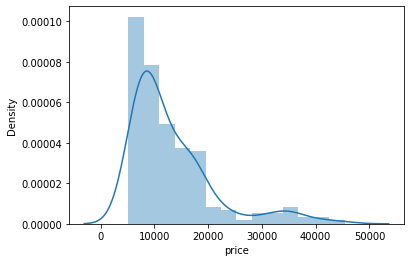

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          204 non-null    int64  
 1   normalized-losses  204 non-null    object 
 2   make               204 non-null    object 
 3   fuel-type          204 non-null    object 
 4   aspiration         204 non-null    object 
 5   num-of-doors       204 non-null    object 
 6   body-style         204 non-null    object 
 7   drive-wheels       204 non-null    object 
 8   engine-location    204 non-null    object 
 9   wheel-base         204 non-null    float64
 10  length             204 non-null    float64
 11  width              204 non-null    float64
 12  height             204 non-null    float64
 13  curb-weight        204 non-null    int64  
 14  engine-type        204 non-null    object 
 15  num-of-cylinders   204 non-null    object 
 16  engine-size        204 non

In [ ]:
df["price"] = pd.to_numeric(df["price"])
sns.distplot(df['price'])
plt.show()
df.info()

 Correlación de variables

Asumiré que un valor mayor a 0.65 entre variables es una correlación fuerte para tomar en cuenta ese parametro. Los mas significativos son `highway-mpg, city-mpg, compression-ratio, engine-size, curb-weight, width, y length`. Tambien tomaré en cuenta el atributo 'make' ya que yo infiero que la marca del automobil si influye en el precio.

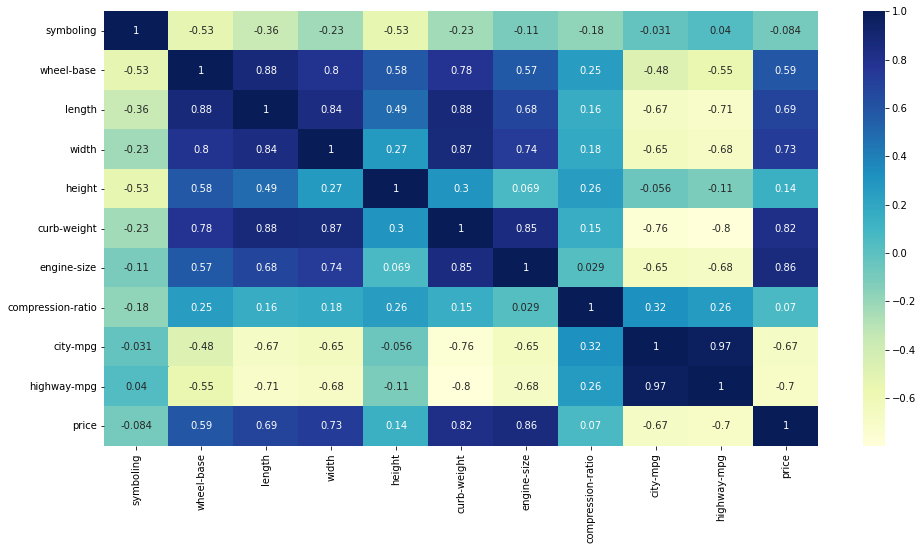

In [ ]:
corrMatrix = df.corr()
# heatmap
plt.figure(figsize=(16,8))
sns.heatmap(corrMatrix, cmap="YlGnBu", annot=True)
plt.show()

Trataré a la variable `symboling` como categórica dado que tiene 6 valores discretos


In [ ]:
# all numeric (float and int) variables in the dataset

cars_numeric = df.select_dtypes(include=['float64', 'int'])
# converting symboling to categorical
cars_numeric['symboling'] = cars_numeric['symboling'].astype('object')

cars_numeric = cars_numeric.drop(['symboling','price'], axis = 1) # drop a variable irrelevante

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


<Figure size 1440x720 with 0 Axes>

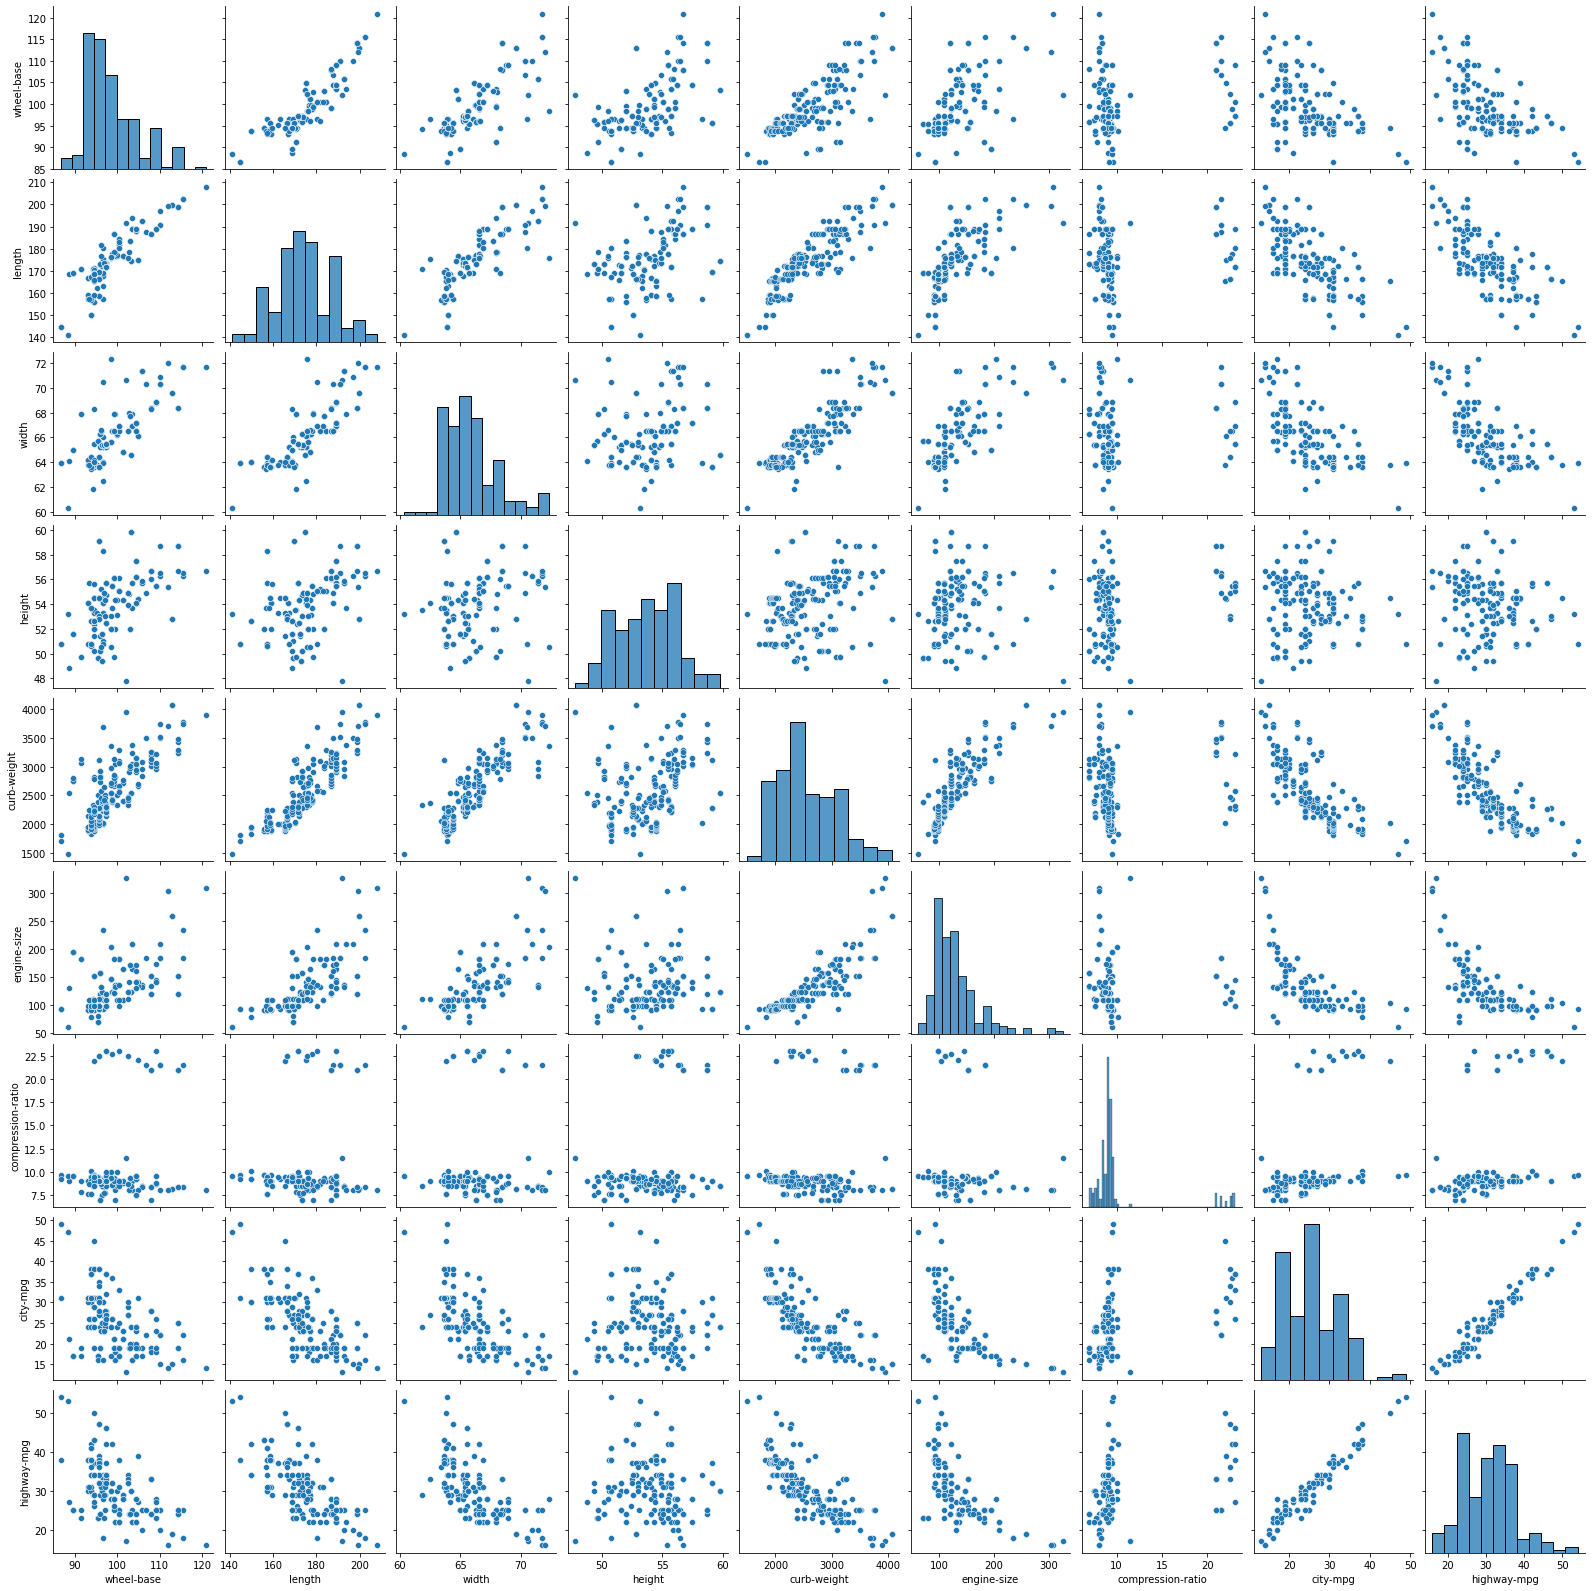

In [ ]:
#pairplot para ver relaciones de cada par de variables
plt.figure(figsize=(20, 10))
sns.pairplot(cars_numeric)
plt.show()


### Creacion del modelo

In [ ]:
## Si itulizo todos los atributos la sesion crashea a partir de grado 4. incluir el atributo make (el unicp categorico) 
vars = df.loc[:,['length','width','curb-weight','engine-size','compression-ratio','city-mpg', 'highway-mpg','make']]


y = df['price']
# subset 
cars_categorical = vars.select_dtypes(include=['object'])
cars_categorical.head()
# highway-mpg, city-mpg, compression-ratio, engine-size, curb-weight, width, y length

,make
0,alfa-romero
1,alfa-romero
2,audi
3,audi
4,audi


In [ ]:
cars_numeric.head()

,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
0,88.6,168.8,64.1,48.8,2548,130,9.0,21,27
1,94.5,171.2,65.5,52.4,2823,152,9.0,19,26
2,99.8,176.6,66.2,54.3,2337,109,10.0,24,30
3,99.4,176.6,66.4,54.3,2824,136,8.0,18,22
4,99.8,177.3,66.3,53.1,2507,136,8.5,19,25


In [ ]:
cars_dummies = pd.get_dummies(cars_categorical, drop_first=True)
cars_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   make_audi           204 non-null    uint8
 1   make_bmw            204 non-null    uint8
 2   make_chevrolet      204 non-null    uint8
 3   make_dodge          204 non-null    uint8
 4   make_honda          204 non-null    uint8
 5   make_isuzu          204 non-null    uint8
 6   make_jaguar         204 non-null    uint8
 7   make_mazda          204 non-null    uint8
 8   make_mercedes-benz  204 non-null    uint8
 9   make_mercury        204 non-null    uint8
 10  make_mitsubishi     204 non-null    uint8
 11  make_nissan         204 non-null    uint8
 12  make_peugot         204 non-null    uint8
 13  make_plymouth       204 non-null    uint8
 14  make_porsche        204 non-null    uint8
 15  make_renault        204 non-null    uint8
 16  make_saab           204 non-null    uint8
 1


En esta parte agrego las variables categóricas mas relevantes, al principio intenté con todos los atributos categoricos (X) y la sesion de colab crasheaba por las operaciones matriciales


In [ ]:
# drop categorical  
X = vars.drop(list(cars_categorical.columns), axis=1)

# concat dummy variables with X
X = pd.concat([cars_numeric, cars_dummies], axis=1) 
X.head()

,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,make_audi,...,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo
0,88.6,168.8,64.1,48.8,2548,130,9.0,21,27,0,...,0,0,0,0,0,0,0,0,0,0
1,94.5,171.2,65.5,52.4,2823,152,9.0,19,26,0,...,0,0,0,0,0,0,0,0,0,0
2,99.8,176.6,66.2,54.3,2337,109,10.0,24,30,1,...,0,0,0,0,0,0,0,0,0,0
3,99.4,176.6,66.4,54.3,2824,136,8.0,18,22,1,...,0,0,0,0,0,0,0,0,0,0
4,99.8,177.3,66.3,53.1,2507,136,8.5,19,25,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y.head()

0    16500
1    16500
2    13950
3    17450
4    15250
Name: price, dtype: int64

Provemos que hace la expansion polinomial 

La expansion polinomial de sklearn regresa una nueva matiz de características con todas las combinaciones polinómicas de las características con grado menor o igual al grado especificado, por ejemplo, las características del polinomio de grado 2 son $$[1, a, b, a^2, ab, b^2]$$, graficamos el numero del polinomio con el del caracteristicas:

Degree: 1, Features: 31
Degree: 2, Features: 496
Degree: 3, Features: 5456
Degree: 4, Features: 46376
Degree: 5, Features: 324632
Degree: 6, Features: 1947792


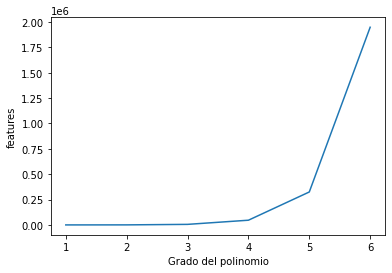

In [ ]:
from sklearn.model_selection import train_test_split

num_features = list()
mse = list()
degrees = [i for i in range(1, 7)]
for d in degrees:
	# create transform
  poly = PolynomialFeatures(degree=d)
  # fit and transform
  data = poly.fit_transform(X)
  # record number of features
  num_features.append(data.shape[1])

	# summarize
  print('Degree: %d, Features: %d' % (d, data.shape[1]))
# plot degree vs number of features
plt.plot(degrees, num_features)
plt.xlabel('Grado del polinomio')
plt.ylabel('features')
plt.show()

## a) Con expansión polinomial
Aqui se puede ajustar el valor de los grados (a partir de grado 10, lasesion crashea por el consumo de ram, lo ajsute maximo a grado 6)

1
2
3
4
5
[7340933.9020388, 72758.68999666821, 50403.75687916454, 45429.73512536392, 43688.662372784245]


Text(0, 0.5, 'MSE')

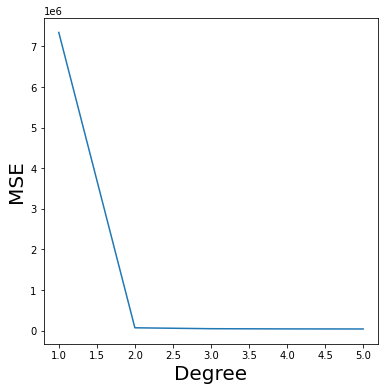

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=0.8)
reps = 10
## Let's find out the model we need to select
maxdegree=6 # The maximum degree we would like to test
training_error=[]
model = LinearRegression()
cross_validation_train=[]
cross_validation_test= []
for d in range(1,maxdegree):
    print("Grado:", d)
    x_poly_train=PolynomialFeatures(degree=d).fit_transform(x_train)

    model=LinearRegression(fit_intercept=False) # minimos cuadrados
    
    model=model.fit(x_poly_train,y_train)
    y_train_pred=model.predict(x_poly_train)
    mse_train=mean_squared_error(y_train,y_train_pred)
    
    # cv es el parametro donde le pasamos de cuantos k seran los folds 
    # seleccionamos mse en el parametro scoring, segun : https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter 
    cve=cross_val_score(model,x_poly_train,y_train,scoring='neg_mean_squared_error',cv=5)
    training_error.append(mse_train)
fig,ax=plt.subplots(figsize=(6,6))
ax.plot(range(1,maxdegree),training_error)
ax.set_xlabel('Degree',fontsize=20)
ax.set_ylabel('MSE',fontsize=20)


Podemos observar que el error se minimiza en los grados 2 y 3 El grado máximo es 10, intente manualmente y despues del 10 crashea la sesion por las operaciones matriciales:

### Comentarios ejercicio A):

> Me gustaria añadir que en la parte de inputaciones y la discriminacion de ciertas variables con cierta corelación para aplicar al modelo, pareciera que hice seleccion de atributios (eliminación, backfill). Pero creo yo funciona bien para llenar datos faltantes y obtener mejores resultados. En la seccion c) utilizo otros metodos 


## b) Expansion polinomial grado 10 con penalizacion por norma $\ell_1$ y $\ell_2$


Primero realizaremos la penalizacion con normal l1 o lasso 

In [ ]:
from sklearn.linear_model import Ridge, Lasso

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X.head()

#normalizamos los datos ya que estaba teniendo unos errores de convergencia


,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,make_audi,...,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo
0,88.6,168.8,64.1,48.8,2548,130,9.0,21,27,0,...,0,0,0,0,0,0,0,0,0,0
1,94.5,171.2,65.5,52.4,2823,152,9.0,19,26,0,...,0,0,0,0,0,0,0,0,0,0
2,99.8,176.6,66.2,54.3,2337,109,10.0,24,30,1,...,0,0,0,0,0,0,0,0,0,0
3,99.4,176.6,66.4,54.3,2824,136,8.0,18,22,1,...,0,0,0,0,0,0,0,0,0,0
4,99.8,177.3,66.3,53.1,2507,136,8.5,19,25,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
maxdegree=6 
X.head()

StandardScaler()


,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,make_audi,...,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo
0,88.6,168.8,64.1,48.8,2548,130,9.0,21,27,0,...,0,0,0,0,0,0,0,0,0,0
1,94.5,171.2,65.5,52.4,2823,152,9.0,19,26,0,...,0,0,0,0,0,0,0,0,0,0
2,99.8,176.6,66.2,54.3,2337,109,10.0,24,30,1,...,0,0,0,0,0,0,0,0,0,0
3,99.4,176.6,66.4,54.3,2824,136,8.0,18,22,1,...,0,0,0,0,0,0,0,0,0,0
4,99.8,177.3,66.3,53.1,2507,136,8.5,19,25,1,...,0,0,0,0,0,0,0,0,0,0


1
2


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.409e+08, tolerance: 1.074e+06
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.389e+07, tolerance: 8.296e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

3


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.614e+07, tolerance: 1.074e+06
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.481e+07, tolerance: 8.296e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

4


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.492e+07, tolerance: 1.074e+06
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.948e+06, tolerance: 8.296e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

5


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.750e+06, tolerance: 1.074e+06
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.276e+06, tolerance: 8.296e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

Text(0, 0.5, 'MSE')

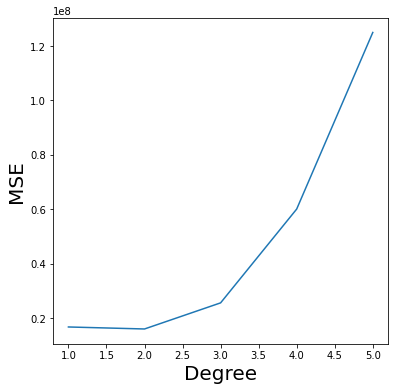

In [ ]:
for d in range(1,maxdegree):
    print(d)
    x_poly_train=PolynomialFeatures(degree=d).fit_transform(x_train)

    lasso = Lasso(alpha=0.001).fit(x_poly_train,y_train)
    y_train_pred = lasso.predict((x_poly_train))
    mse_train=mean_squared_error(y_train,y_train_pred)

    #cross_validate difiere un poco de cross_val_score en cuanto a que puede regresar mas metricas, pero e similar
    # seleccionamos mse en el parametro scoring, segun : https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter 
    cve=cross_validate(lasso,x_poly_train,y_train,scoring='neg_mean_squared_error',cv=5)
    training_error.append(mse_train)
    cross_validation_train.append(np.mean(np.absolute(cve['test_score']))) #obtenemos el test_score para ver el error de cross valid
fig,ax=plt.subplots(figsize=(6,6))
ax.plot(range(1,maxdegree),cross_validation_train)
ax.set_xlabel('Degree',fontsize=20)
ax.set_ylabel('MSE',fontsize=20)


En esta parte utilicé el StandardScaler que me recomendaban en este issue por los errores de no [convergencia](https://github.com/scikit-learn/scikit-learn/issues/11536). En fin creo que hice algo mal :( por que conforme el grado del polinomio aumenta, tambien el ecm, y deberia ir bajando 

## C) Expansion polinomial grado 2, con seleccion de atributos 
En esta parte solo seleccionaré solo la marca del carro para ver que influecia tiene 


1
2
3
4
5
6
[15396935.817524234, 16309269.36196319, 19595074.90797546, 15968095.177914111, 18176044.134969324, 20095850.17177914]


Text(0, 0.5, 'MSE')

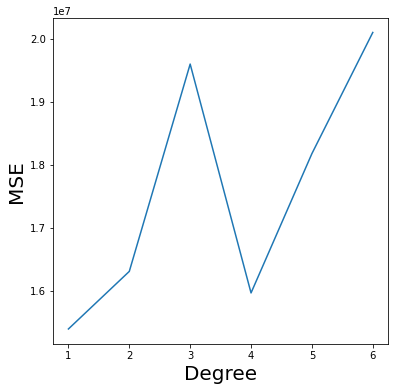

In [ ]:
x_make = cars_dummies
x_make

y_m = y
x_make.shape, y_m.shape


x_train,x_test,y_train,y_test=train_test_split(x_make,y_m,train_size=0.8)
reps = 10

## Let's find out the model we need to select
maxdegree=7 # The maximum degree we would like to test
training_error=[]
model = LinearRegression()
cross_validation_train=[]
cross_validation_test= []
for d in range(1,maxdegree):
    print(d)
    x_poly_train=PolynomialFeatures(degree=d).fit_transform(x_train)
    
    model=model.fit(x_poly_train,y_train)
    y_train_pred=model.predict(x_poly_train)
    mse_train=mean_squared_error(y_train,y_train_pred)
    
    # cv es el parametro donde le pasamos cuantos k seran los folds 
    # seleccionamos mse en el parametro scoring, segun : https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter 
    cve=cross_val_score(model,x_poly_train,y_train,scoring='neg_mean_squared_error',cv=5)
    training_error.append(mse_train)
  
fig,ax=plt.subplots(figsize=(6,6))
ax.plot(range(1,maxdegree),training_error)
ax.set_xlabel('Degree',fontsize=20)
ax.set_ylabel('MSE',fontsize=20)

Al final puedo decir que en general el error en los 3 modelos me sale demasiado alto, el unico caso donde le fue mejor al modelo fue en el ejercicio a) donde tome los atributos con mas correlación y la variable dummy de make. Utilice hasta el grado 6 por que es el grado que soportaba sin que crasheara la sesion de colab

1
2
3
4
5
6
[888951.196190653, 7.685045227143542e-17, 2.1101128803980794e-16, 9.928225343720145e-17, 5.370301019810113e-16, 5.2632133656322665e-15]


Text(0, 0.5, 'MSE')

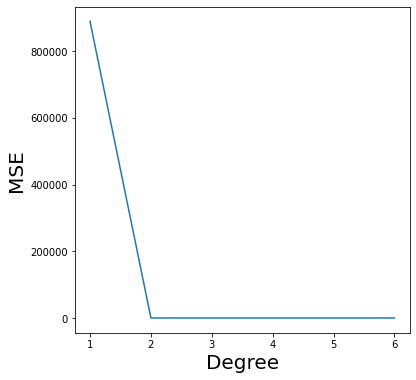

In [ ]:
#Probemos el modelo del ejercicio a) en el conjunto de prueba 

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size = 0.20)
reps = 10
## Let's find out the model we need to select
maxdegree=7 # The maximum degree we would like to test
training_error=[]
model = LinearRegression()
cross_validation_train=[]
cross_validation_test= []
for d in range(1,maxdegree):
    print(d)
    x_poly_test=PolynomialFeatures(degree=d).fit_transform(x_test)    
    model=model.fit(x_poly_test,y_test)
    y_test_pred=model.predict(x_poly_test)
    mse_train=mean_squared_error(y_test,y_test_pred)
    
    # cv es el parametro donde le pasamos cuantos k seran los folds 
    # seleccionamos mse en el parametro scoring, segun : https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter 
    cve=cross_val_score(model,x_poly_test,y_test,scoring='neg_mean_squared_error',cv=5)
    training_error.append(mse_train)  
    #cross_validation_train.append(np.mean(np.absolute(cve['test_score']))) #obtenemos el test_score para ver el error de cross valid
fig,ax=plt.subplots(figsize=(6,6))
ax.plot(range(1,maxdegree),training_error)
ax.set_xlabel('Degree',fontsize=20)
ax.set_ylabel('MSE',fontsize=20)
